# Linear Regression with Smoothing Multi

In [41]:
# import necessary library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import sys
sys.path.append('../')
from Constants import Constants

# for waveform analysis
TEST_DATASET_PATH = Constants.PATH_WLI_TESTSET
TEST_CATEGORIES = Constants.TEST_CATEGORIES

In [42]:
# Load test files
import os

# path to test files
test_dir = TEST_DATASET_PATH
test_categories = TEST_CATEGORIES

# check the 3 directories
for category in test_categories:
    path = os.path.join(test_dir, category)
    # check if the path exists
    if os.path.exists(path):
        print("Path exists: " + path)
        # print the number of files in each directory
        print(category + " has " + str(len(os.listdir(path))) + " files.")
    else:
        print("Path does not exist: " + path)
    

Path exists: C:\M15\LV5600_PoC\Data\TestSet\OverSaturated
OverSaturated has 70 files.
Path exists: C:\M15\LV5600_PoC\Data\TestSet\UnderSaturated
UnderSaturated has 80 files.
Path exists: C:\M15\LV5600_PoC\Data\TestSet\JustSaturated
JustSaturated has 50 files.


In [43]:
# path to image folder

def linear_regression_process(img,print_info=False):
    # read image
    img_test = img
    # convert to normal colorspace
    img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

    # define ROI
    x_start,x_end,y_start,y_end = 600,1270,60,300 # 670x240

    # crop image
    img_test = img_test[y_start:y_end,x_start:x_end]

    # isolate the blue pixels
    lower_blue = np.array([0,0,200])
    upper_blue = np.array([100,100,255])
    mask = cv2.inRange(img_test, lower_blue, upper_blue)

    y,x = np.where(mask==255)
    # if cannot find blue, return 0
    if len(x)==0:
        return 190
    
    y = max(y) - y
    
    # create dataframe
    df = pd.DataFrame({'x':x, 'y':y})


    # sort based on x 
    df = df.sort_values(by=['x']) # type: ignore

    # for the same x, average the y
    df = df.groupby('x').mean().reset_index()

    # make every point the avaerage of the 5 points around it
    df['y'] = df['y'].rolling(20,center=True).mean()

    # extract peak value
    peak = df['y'].max()

    # extract peak location
    peak_location = df['x'][df['y'].idxmax()]

    # find coordinates to the left of the peak, compare x value, select 100 of them
    left_coordinates = df[df['x']<peak_location].sort_values(by=['x'],ascending=False).head(50)

    # find coordinates to the right of the peak, compare x value, select 100 of them
    right_coordinates = df[df['x']>peak_location].sort_values(by=['x'],ascending=True).head(50)

    # eliminate all NaN values
    left_coordinates = left_coordinates.dropna()
    right_coordinates = right_coordinates.dropna()
    

    # perfome linear regresion on the left and right side
    left_model = LinearRegression().fit(left_coordinates['x'].values.reshape(-1,1), left_coordinates['y'].values.reshape(-1,1))
    right_model = LinearRegression().fit(right_coordinates['x'].values.reshape(-1,1), right_coordinates['y'].values.reshape(-1,1))

    # calculate formula of the fit line
    left_slope = left_model.coef_[0][0]
    left_intercept = left_model.intercept_[0]
    right_slope = right_model.coef_[0][0]
    right_intercept = right_model.intercept_[0]

 

    # calculate the angle of the two fitted lines
    angle = np.arctan((right_slope-left_slope)/(1+right_slope*left_slope))

    # angle is in radians, convert to degrees
    angle = angle*180/np.pi
    angle  = 180+angle if angle<0 else angle

    if(print_info):
        plt.scatter(df['x'],df['y'],s=10,alpha=0.5)
        plt.scatter(left_coordinates['x'],left_coordinates['y'],s=10,alpha=0.5,color='r')
        plt.scatter(right_coordinates['x'],right_coordinates['y'],s=10,alpha=0.5,color='b')
        plt.plot(left_coordinates['x'],left_model.predict(left_coordinates['x'].values.reshape(-1,1)),color='green')
        plt.plot(right_coordinates['x'],right_model.predict(right_coordinates['x'].values.reshape(-1,1)),color='purple')
        plt.title('Angle: '+str(angle))


        plt.show()

    return angle



In [44]:

def test_linear_regression(mode, printInfo = False):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    import os
    import random

    failure_dict = {}
    success_dict = {}

    oversaturate_angle = []
    undersaturate_angle = []
    justsaturate_angle = []

    # process image
    for cat in test_categories:
        img_files = os.listdir(os.path.join(test_dir, cat))
        for file in img_files:
            img = cv2.imread(os.path.join(test_dir, cat, file))
            angle = linear_regression_process(img,printInfo)
            if cat == "OverSaturated":
                oversaturate_angle.append(angle)
            elif cat == "UnderSaturated":
                undersaturate_angle.append(angle)
            elif cat == "JustSaturated":
                justsaturate_angle.append(angle)
    
    return oversaturate_angle, undersaturate_angle, justsaturate_angle
            



UnderSaturatedClose0.bmp


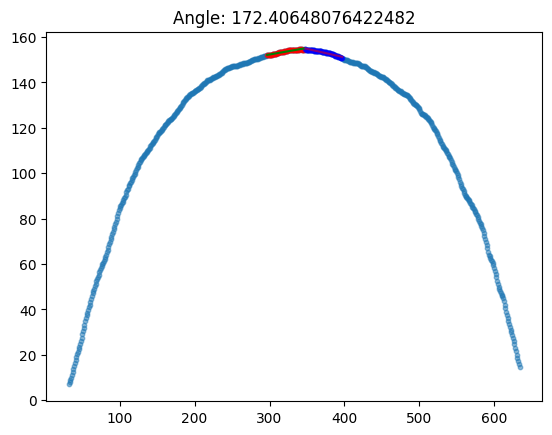

UnderSaturatedClose1.bmp


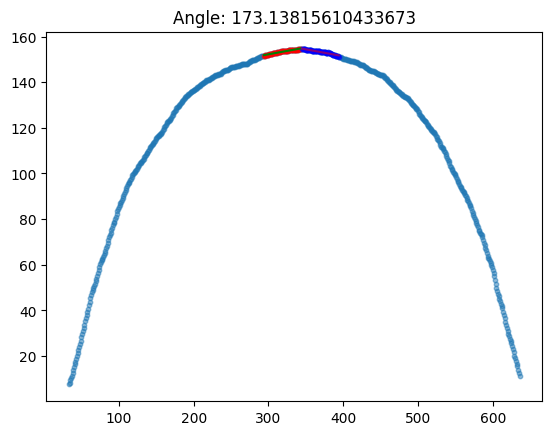

UnderSaturatedClose10.bmp


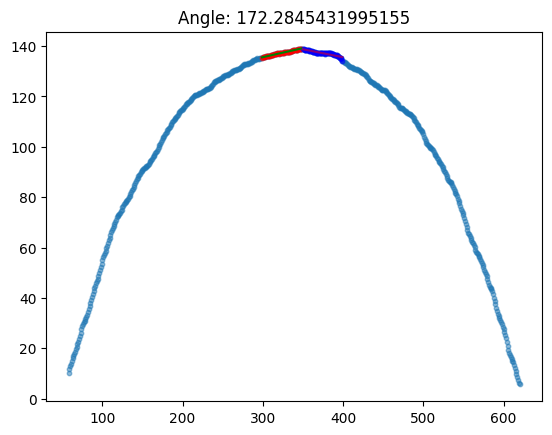

UnderSaturatedClose11.bmp


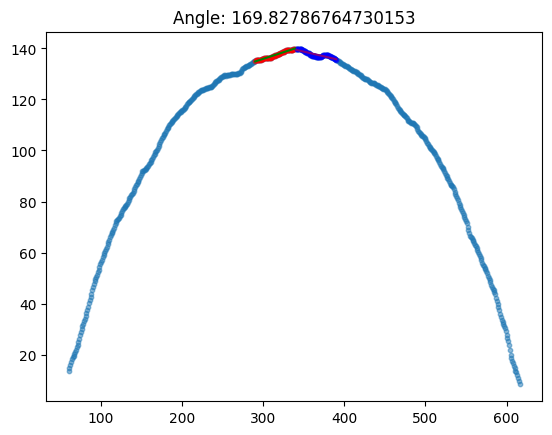

UnderSaturatedClose12.bmp


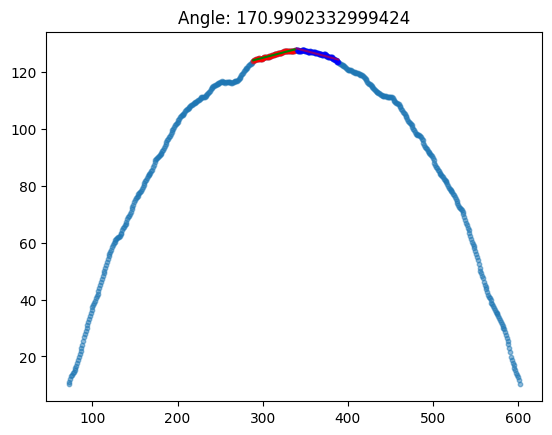

UnderSaturatedClose13.bmp


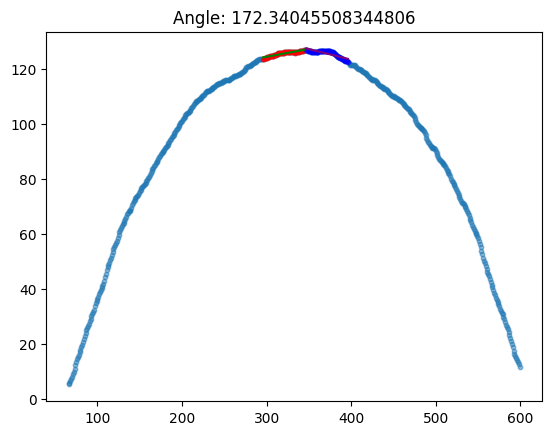

UnderSaturatedClose14.bmp


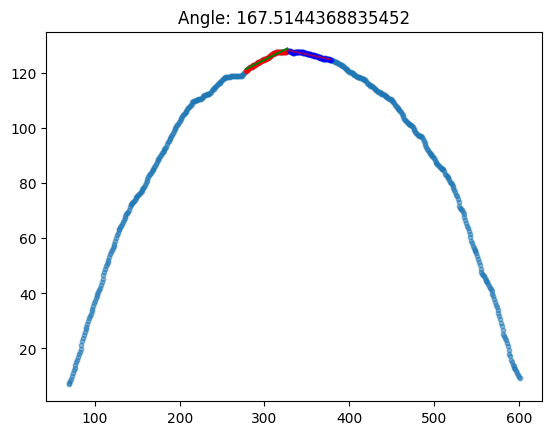

UnderSaturatedClose15.bmp


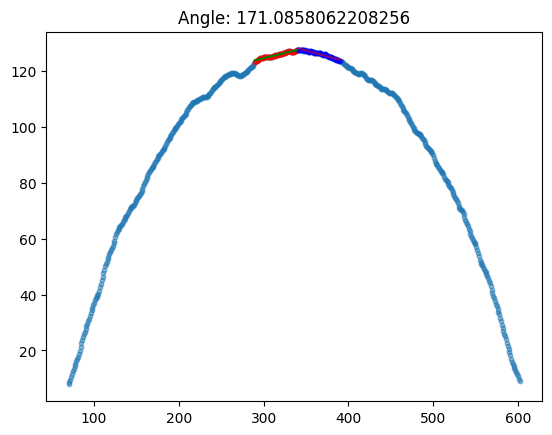

UnderSaturatedClose16.bmp


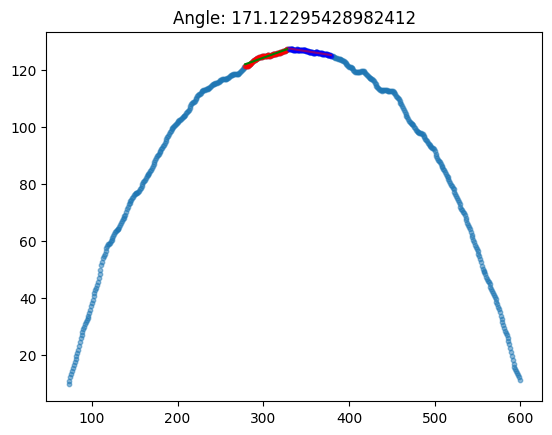

UnderSaturatedClose17.bmp


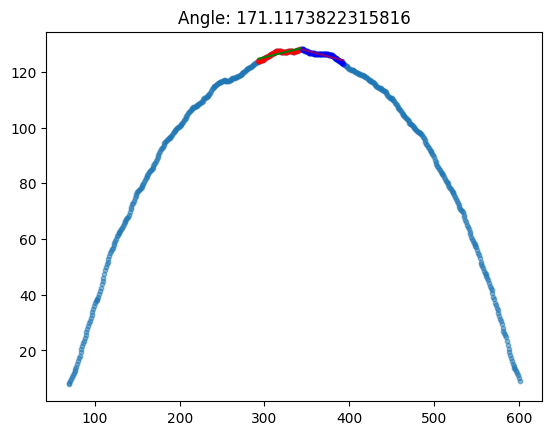

UnderSaturatedClose18.bmp


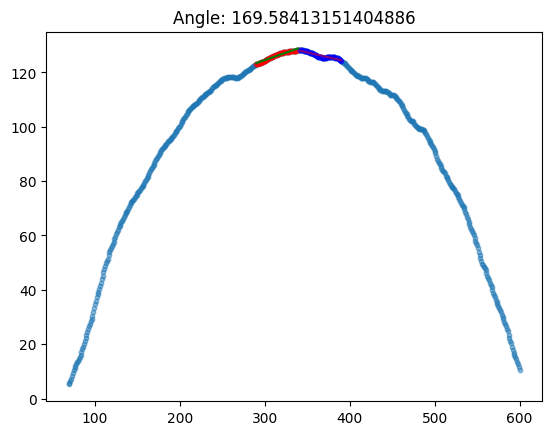

UnderSaturatedClose19.bmp


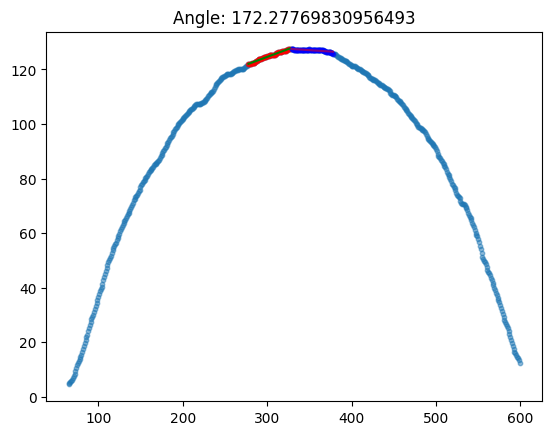

UnderSaturatedClose2.bmp


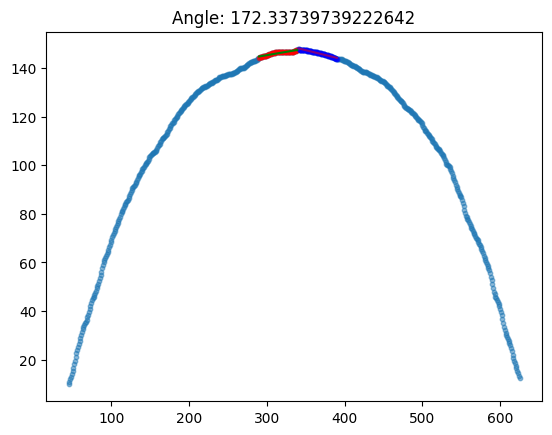

UnderSaturatedClose3.bmp


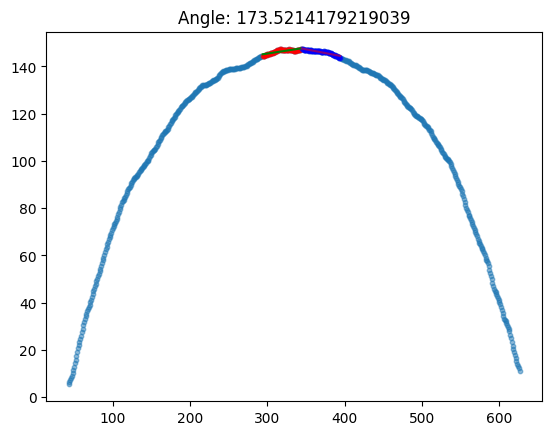

UnderSaturatedClose4.bmp


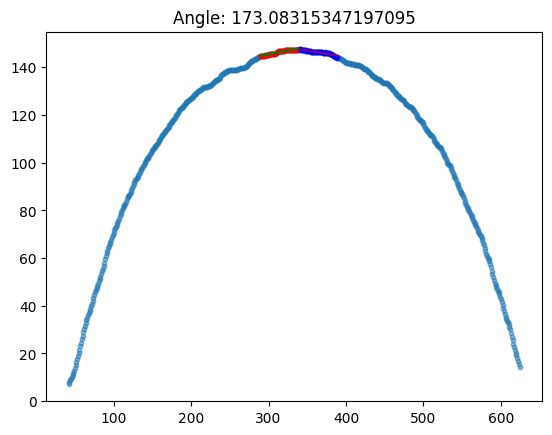

UnderSaturatedClose5.bmp


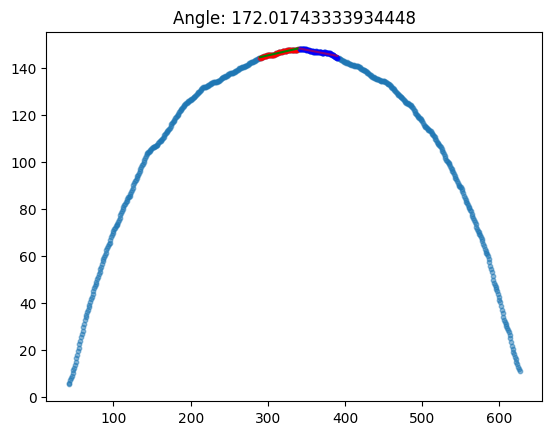

UnderSaturatedClose6.bmp


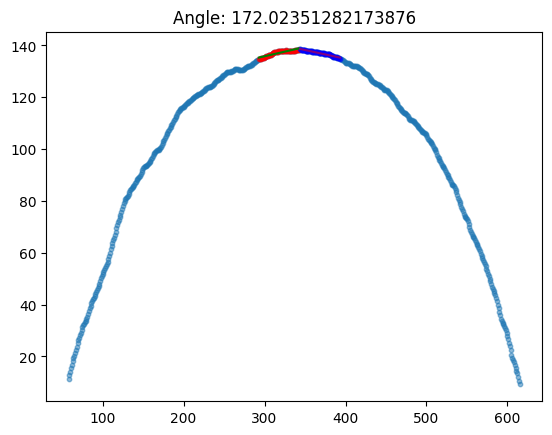

UnderSaturatedClose7.bmp


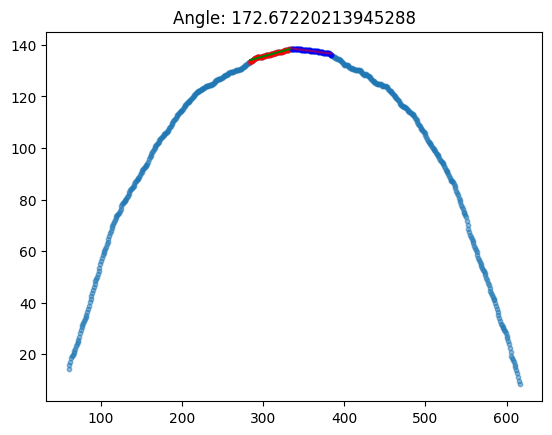

UnderSaturatedClose8.bmp


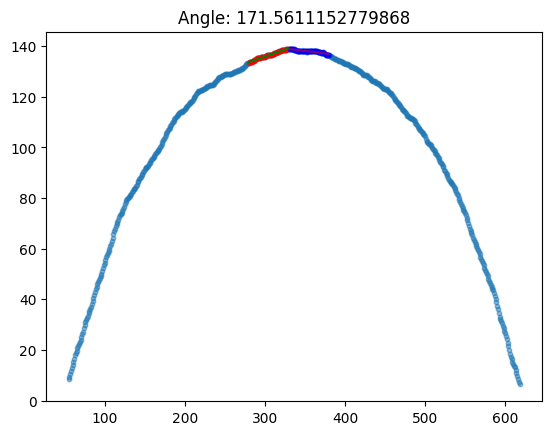

UnderSaturatedClose9.bmp


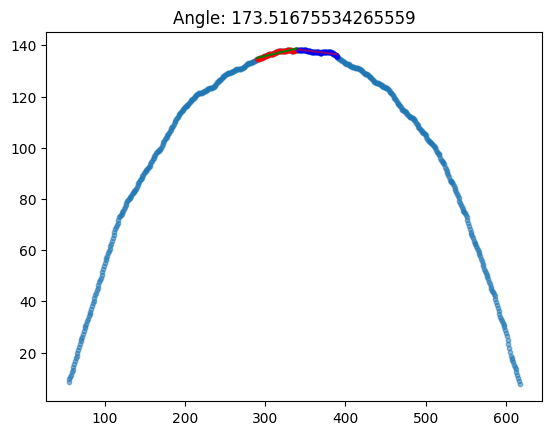

UnderSaturatedExClose0.bmp


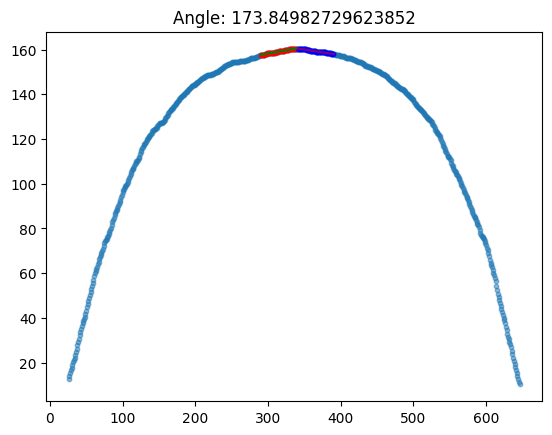

UnderSaturatedExClose1.bmp


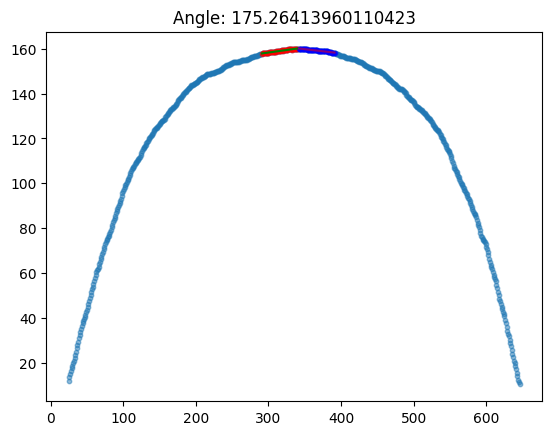

UnderSaturatedExClose10.bmp


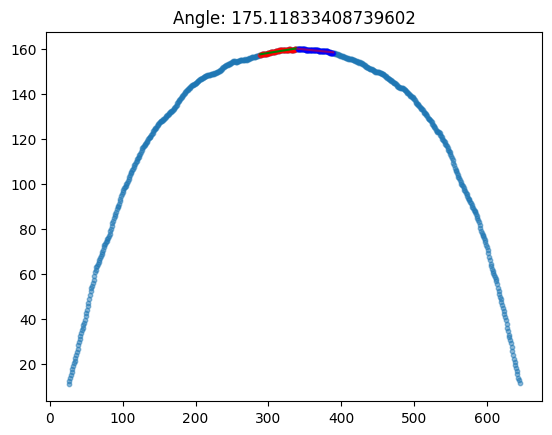

UnderSaturatedExClose11.bmp


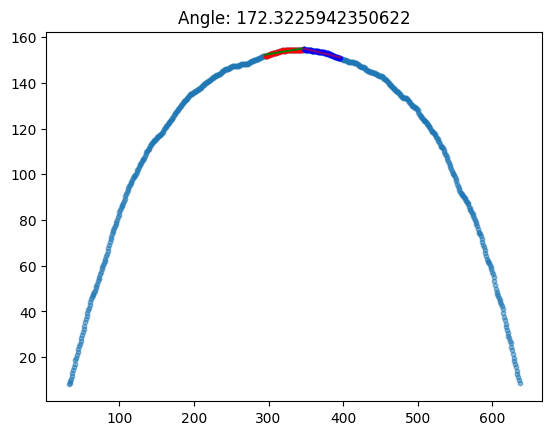

UnderSaturatedExClose12.bmp


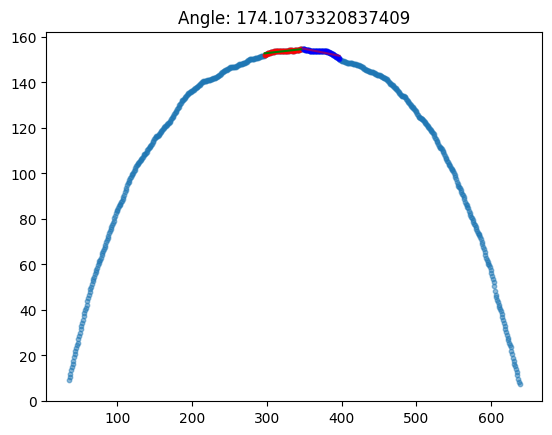

UnderSaturatedExClose13.bmp


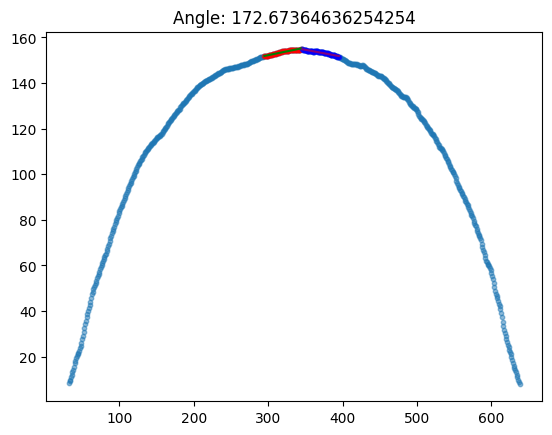

UnderSaturatedExClose14.bmp


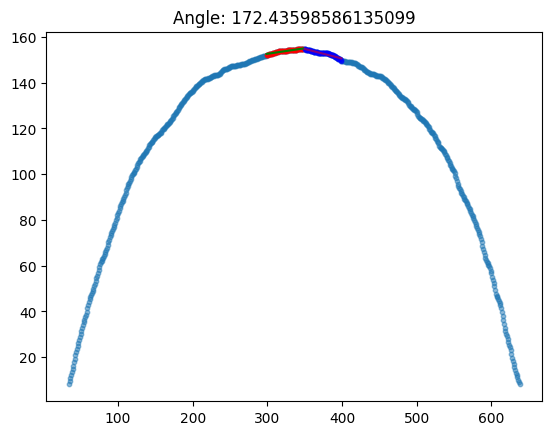

UnderSaturatedExClose15.bmp


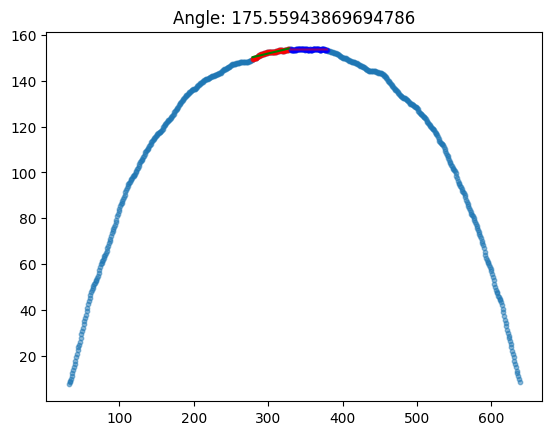

UnderSaturatedExClose16.bmp


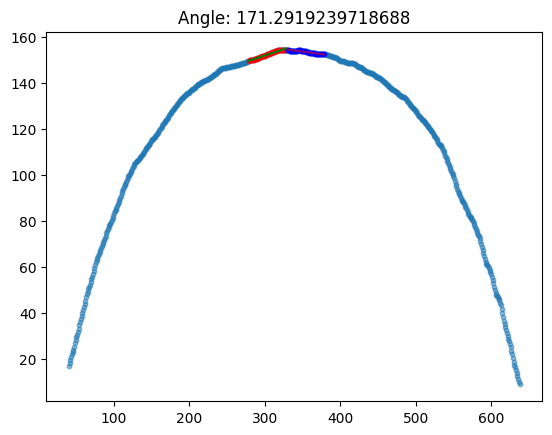

UnderSaturatedExClose17.bmp


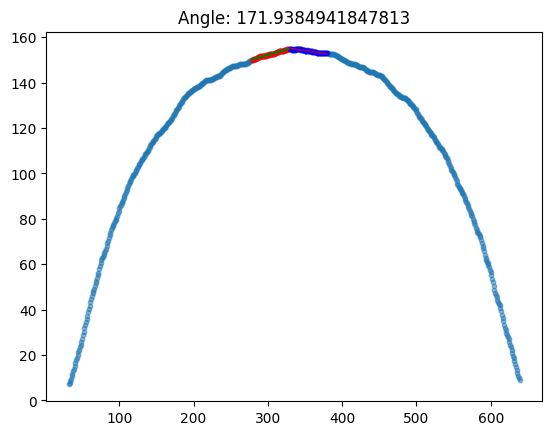

UnderSaturatedExClose18.bmp


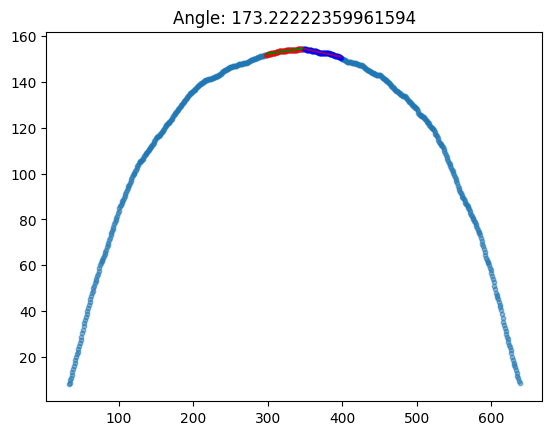

UnderSaturatedExClose19.bmp


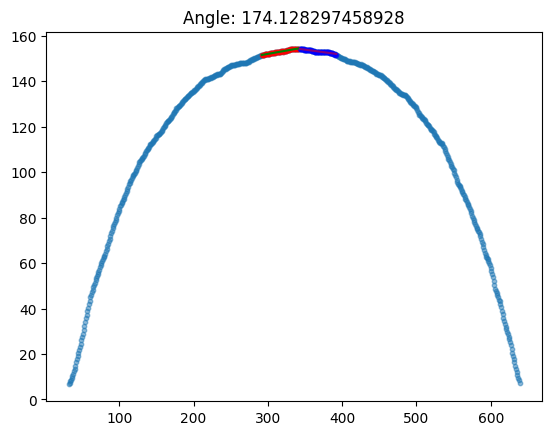

UnderSaturatedExClose2.bmp


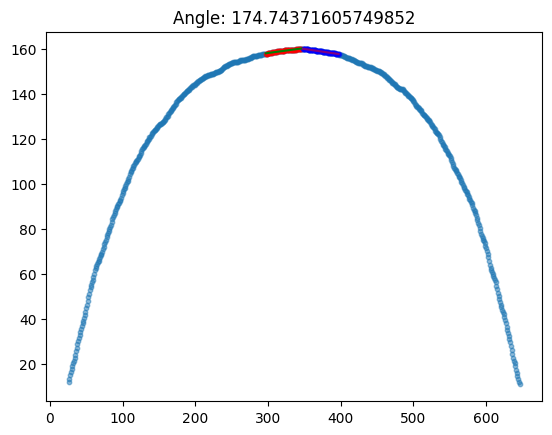

UnderSaturatedExClose3.bmp


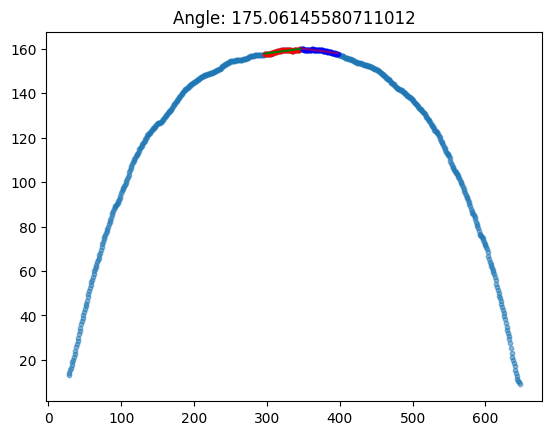

UnderSaturatedExClose4.bmp


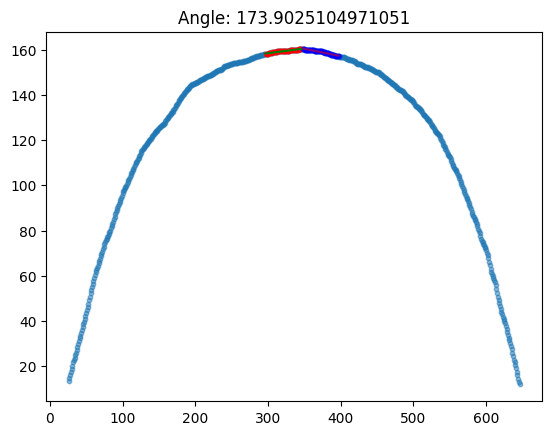

UnderSaturatedExClose5.bmp


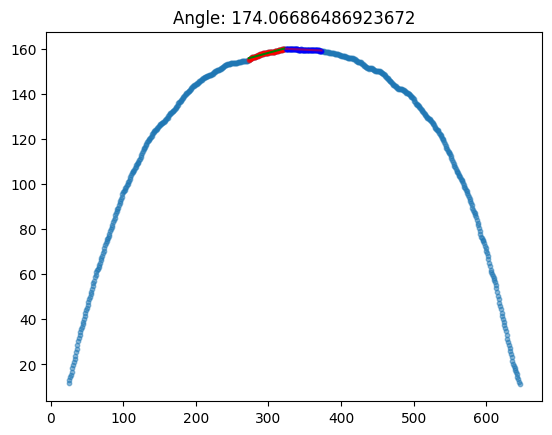

UnderSaturatedExClose6.bmp


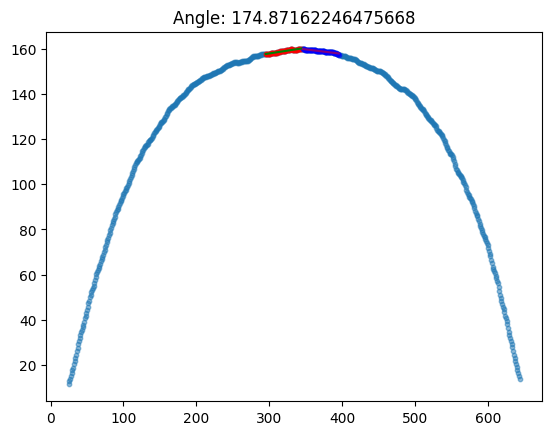

UnderSaturatedExClose7.bmp


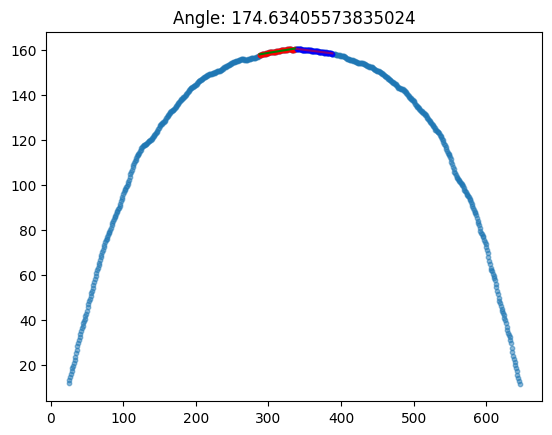

UnderSaturatedExClose8.bmp


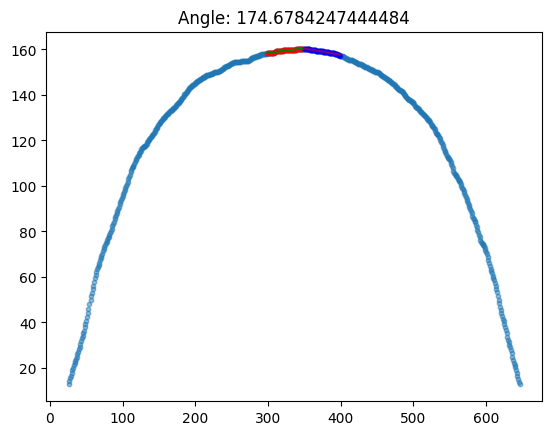

UnderSaturatedExClose9.bmp


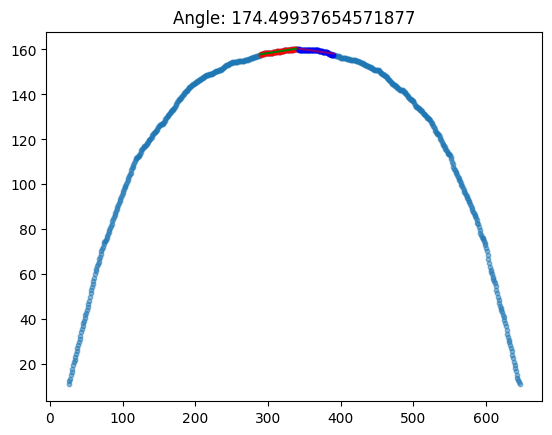

UnderSaturatedFar0.bmp


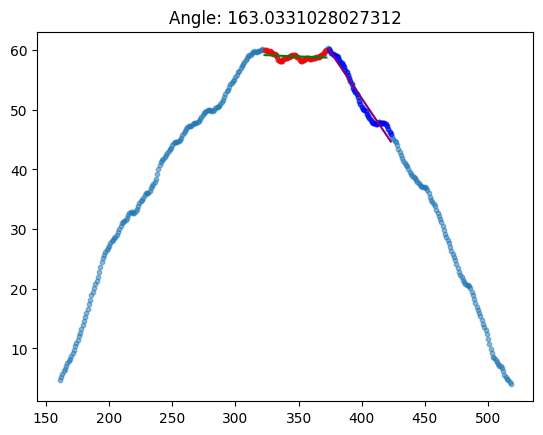

UnderSaturatedFar1.bmp


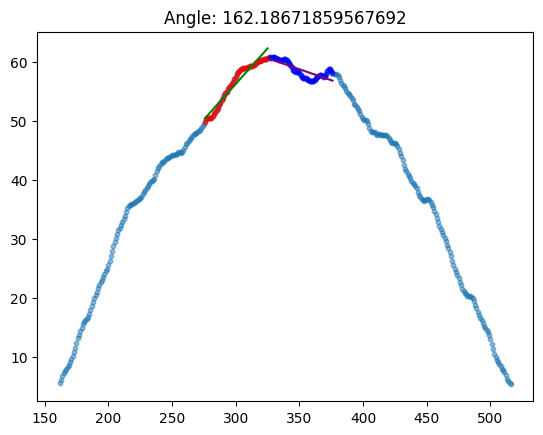

UnderSaturatedFar10.bmp


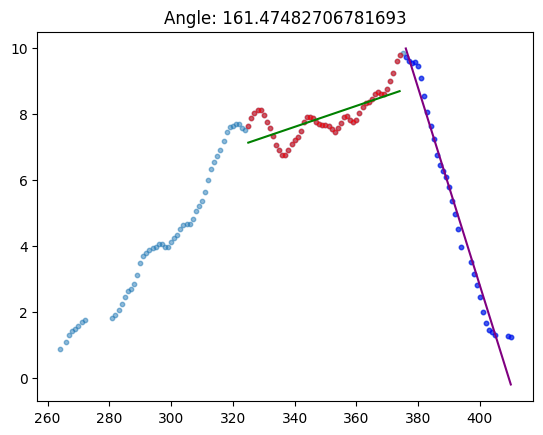

UnderSaturatedFar11.bmp
UnderSaturatedFar12.bmp
UnderSaturatedFar13.bmp
UnderSaturatedFar14.bmp
UnderSaturatedFar15.bmp
UnderSaturatedFar16.bmp
UnderSaturatedFar17.bmp
UnderSaturatedFar18.bmp
UnderSaturatedFar19.bmp
UnderSaturatedFar2.bmp


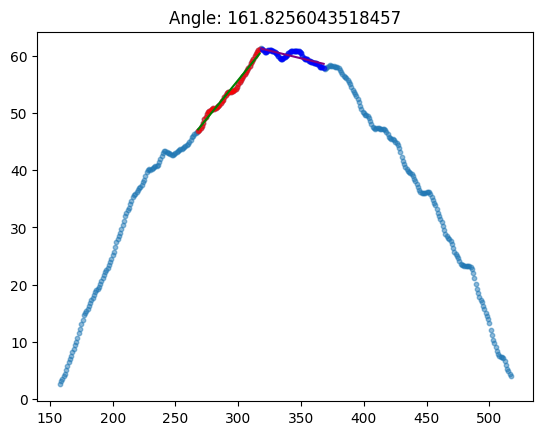

UnderSaturatedFar3.bmp


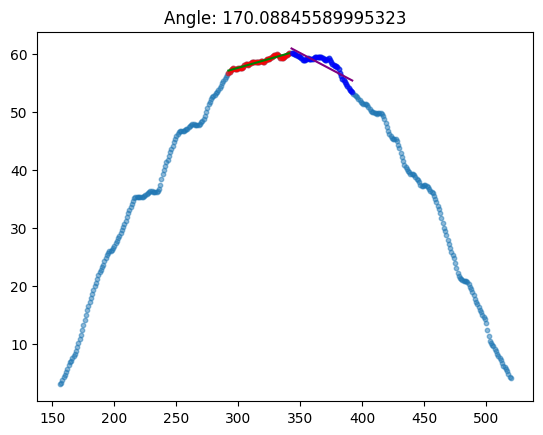

UnderSaturatedFar4.bmp


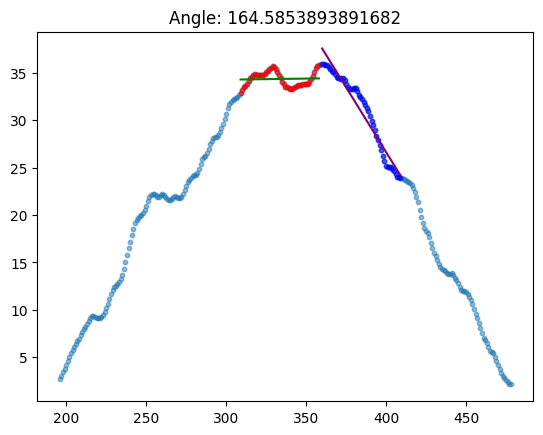

UnderSaturatedFar5.bmp


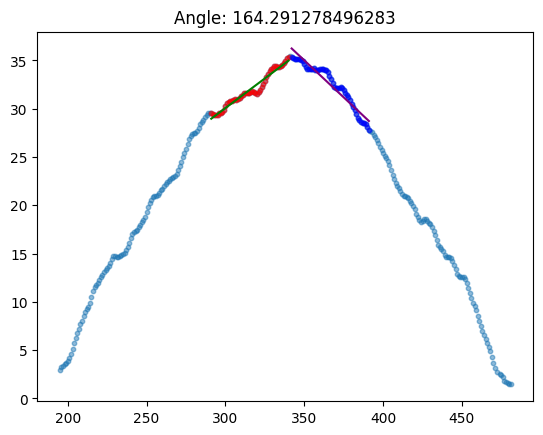

UnderSaturatedFar6.bmp


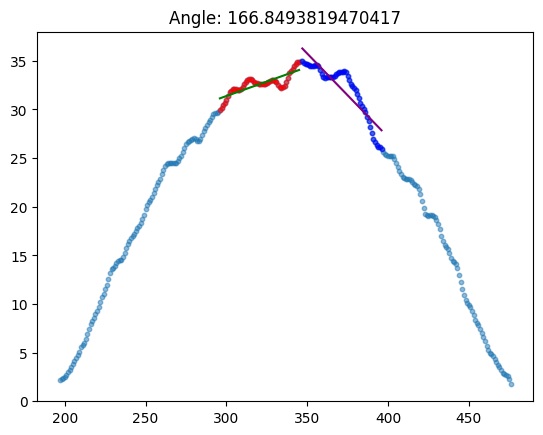

UnderSaturatedFar7.bmp


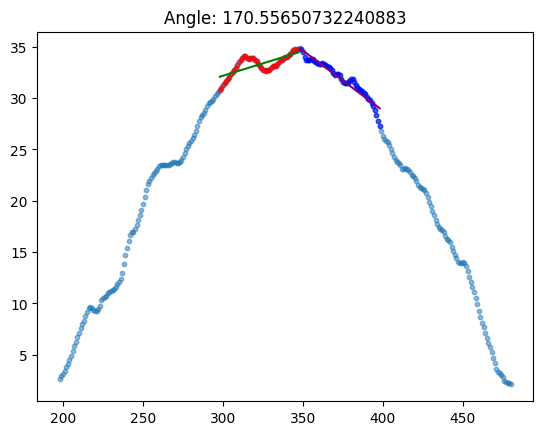

UnderSaturatedFar8.bmp


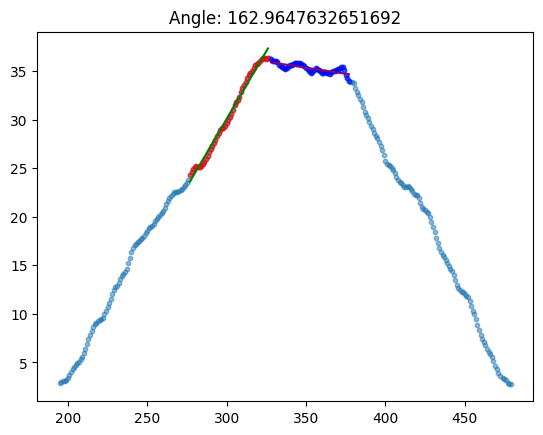

UnderSaturatedFar9.bmp


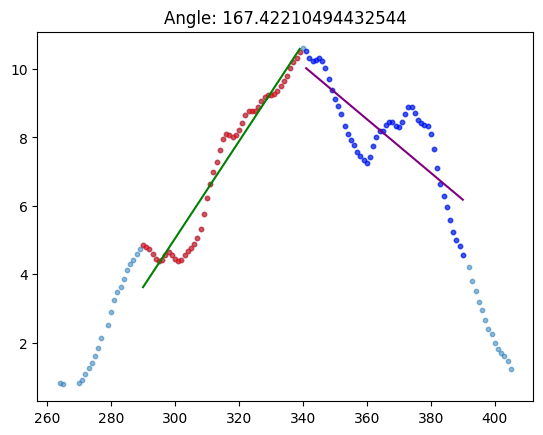

UnderSaturatedMid0.bmp


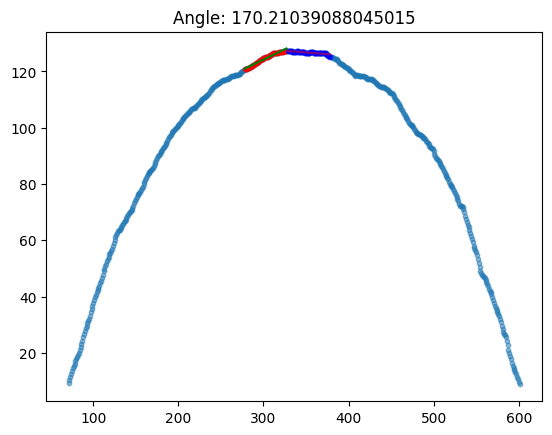

UnderSaturatedMid1.bmp


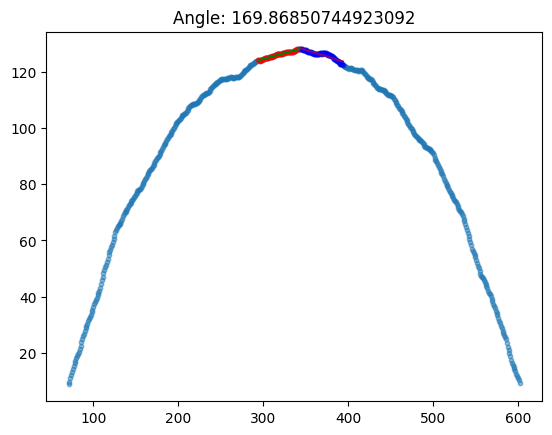

UnderSaturatedMid10.bmp


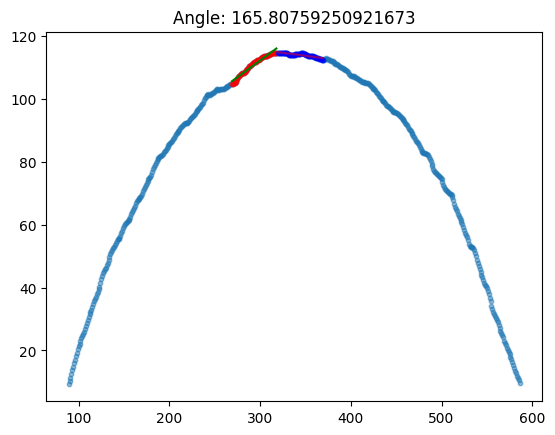

UnderSaturatedMid11.bmp


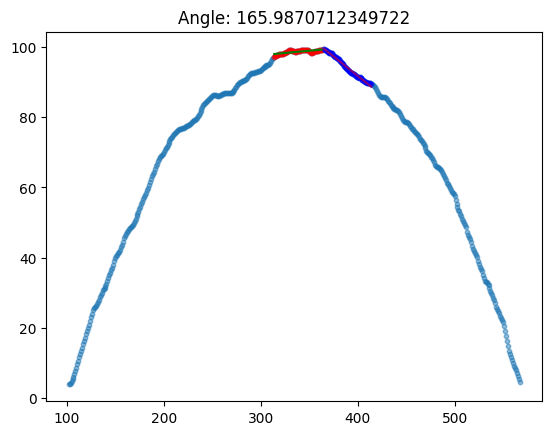

UnderSaturatedMid12.bmp


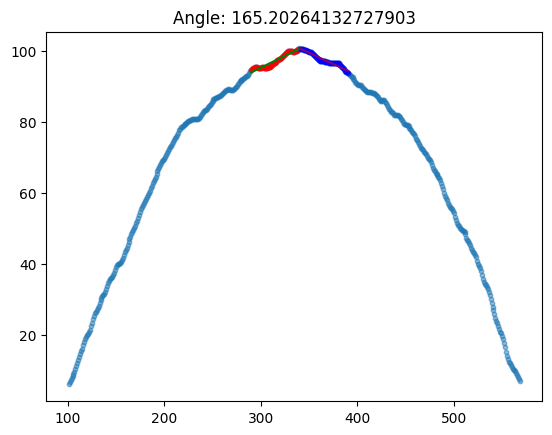

UnderSaturatedMid13.bmp


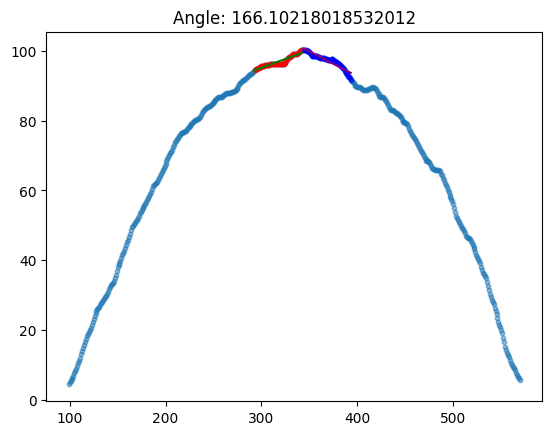

UnderSaturatedMid14.bmp


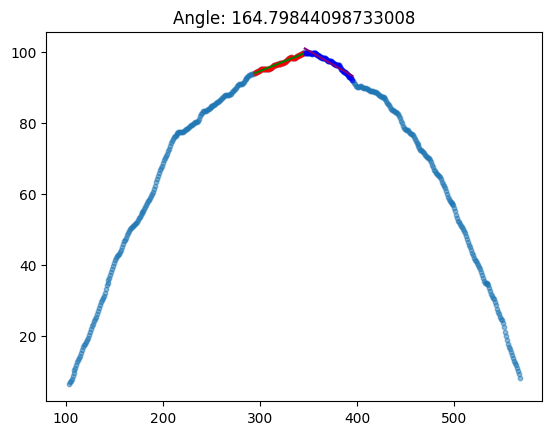

UnderSaturatedMid15.bmp


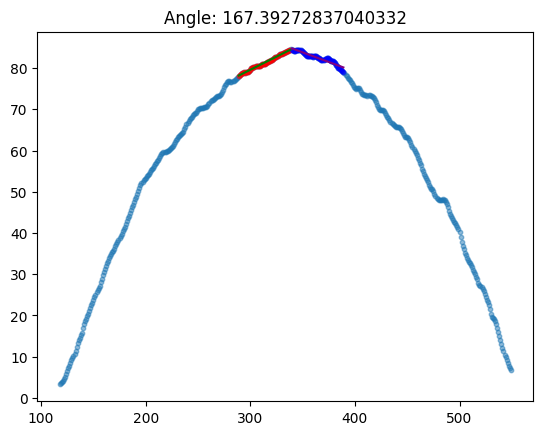

UnderSaturatedMid16.bmp


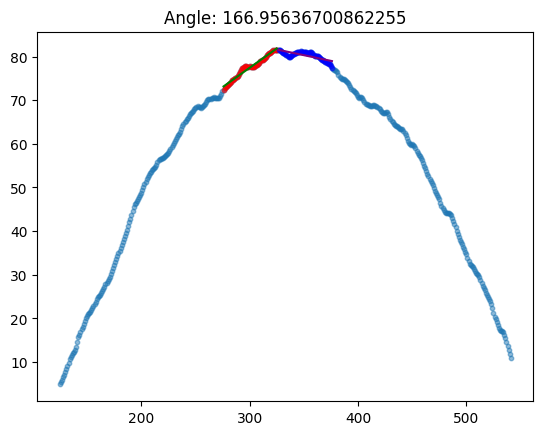

UnderSaturatedMid17.bmp


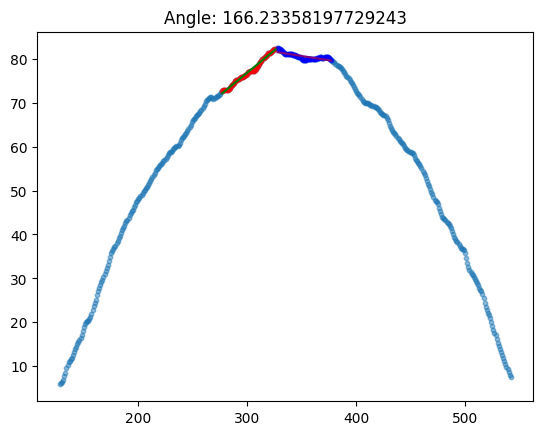

UnderSaturatedMid18.bmp


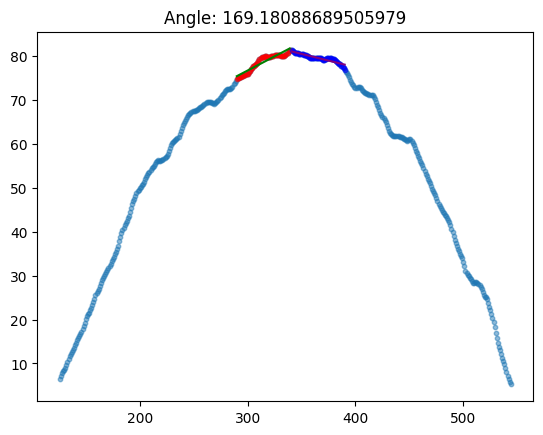

UnderSaturatedMid19.bmp


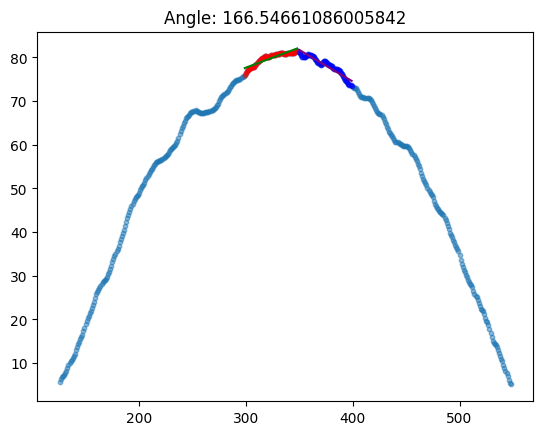

UnderSaturatedMid2.bmp


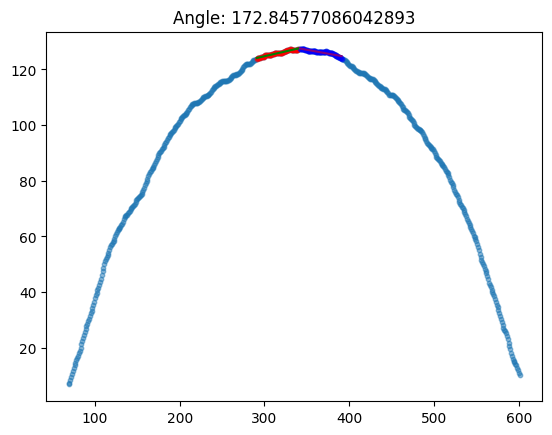

UnderSaturatedMid3.bmp


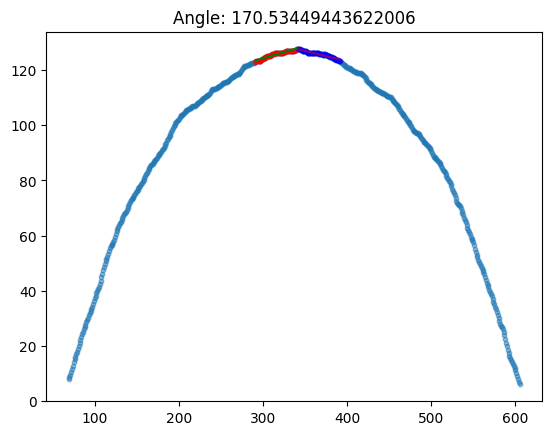

UnderSaturatedMid4.bmp


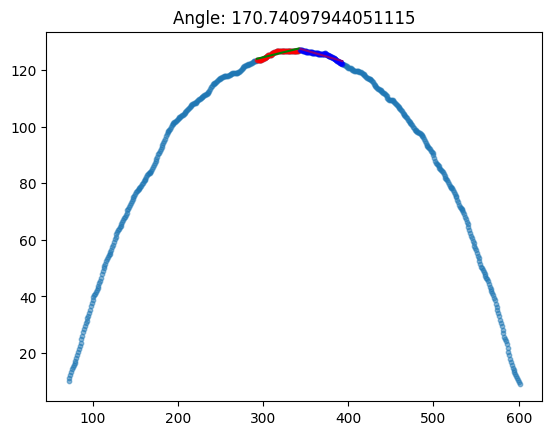

UnderSaturatedMid5.bmp


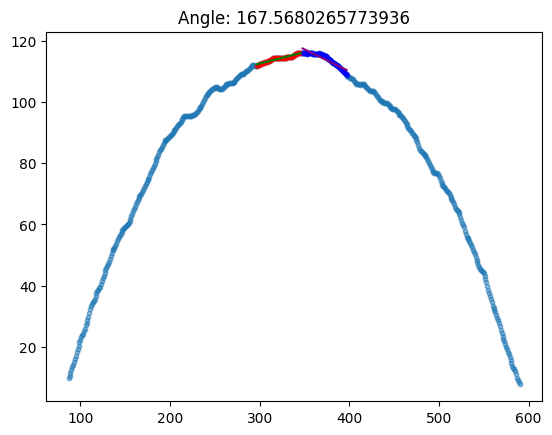

UnderSaturatedMid6.bmp


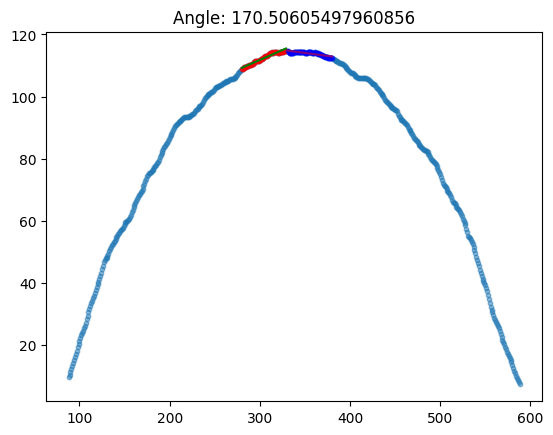

UnderSaturatedMid7.bmp


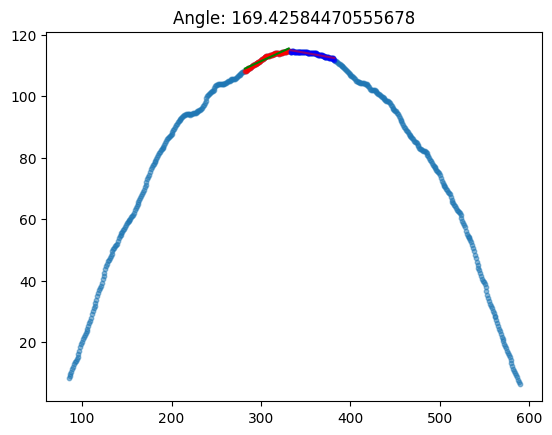

UnderSaturatedMid8.bmp


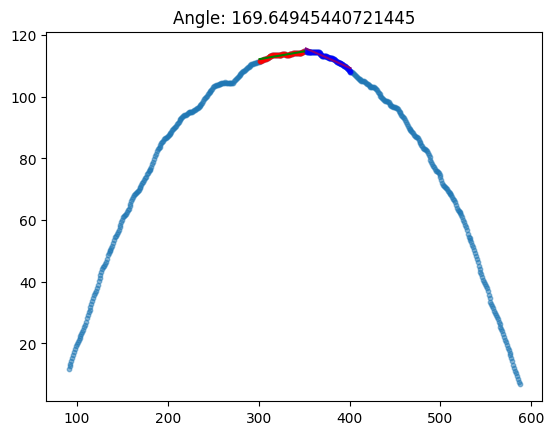

UnderSaturatedMid9.bmp


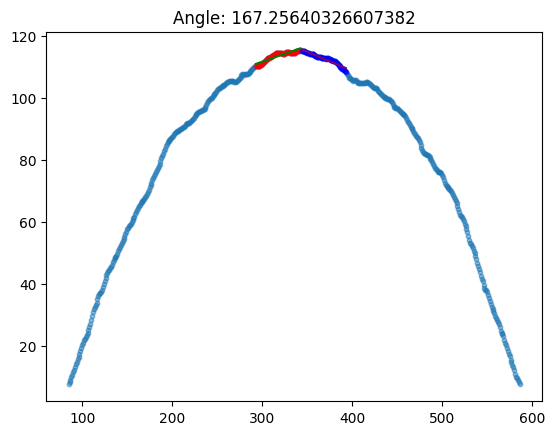

In [47]:
undersaturate_angle = []
img_files = os.listdir(os.path.join(test_dir, "JustSaturated"))
for file in img_files:
    print(file)
    img = cv2.imread(os.path.join(test_dir, "JustSaturated", file))
    angle = linear_regression_process(img,True)
    undersaturate_angle.append(angle)



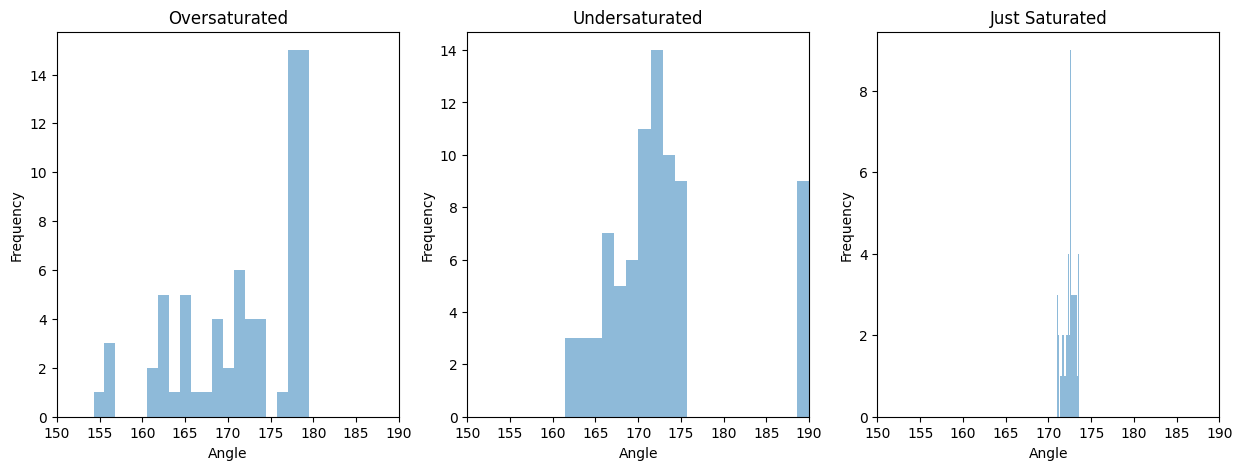

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# loop over test pixel range

# run linear regression test
oversaturate_angle, undersaturate_angle, justsaturate_angle = test_linear_regression("multi", False)

# plot the histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.hist(np.ravel(oversaturate_angle), bins=20, alpha=0.5, label='oversaturate')
ax1.set_xlabel('Angle')
ax1.set_ylabel('Frequency')
ax1.set_title('Oversaturated')
ax1.set_xlim(150, 190)

ax2.hist(np.ravel(undersaturate_angle), bins=20, alpha=0.5, label='undersaturate')
ax2.set_xlabel('Angle')
ax2.set_ylabel('Frequency')
ax2.set_title('Undersaturated')
ax2.set_xlim(150, 190)

ax3.hist(np.ravel(justsaturate_angle), bins=20, alpha=0.5, label='justsaturate')
ax3.set_xlabel('Angle')
ax3.set_ylabel('Frequency')
ax3.set_title('Just Saturated')
# set x-axis from 150 to 190
ax3.set_xlim(150, 190)

plt.show()
